# Health And Safety Notebook <br> ~ Nick Usme

---

### This notebook will cover some of our findings and key takeaways when researching what makes for a good neighborhood. This particular notebook will focus on criteria that fall under the health and safety in Pittsburgh neighborhoods, more specifically crime and things of that matter.

<font size=1> *This notebook was created with the use of data taken from the 2010 Pittsburgh SNAP Census Data found on https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0 *</font>

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import geopandas as geo
%matplotlib inline
import matplotlib.pyplot as plt

#Accessing and reading public safety CSV file
public_safety = pd.read_csv("public_safety.csv", 
                                       index_col="Neighborhood")
public_safety

,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
Neighborhood,,,,,,,,,,,,,,
Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,"2,669",92,184,73,3.4,6.9,0,0,12,9,24,12,29
West End,4,254,23,54,66,9.1,21.3,0,1,2,3,7,3,30
West Oakland,14,"2,604",82,65,80,3.1,2.5,1,1,13,4,14,8,13


---

## THEFT!

### For this stage of my analysis, I will review the number of thefts committed per nieghborhood. This will take into account reported crimes such as auto thefts, burglaries, and robberies.

-------------------------------------------------<br>First, lets check the number of burglaries per neighborhood:

In [2]:
#Sort the dataframe by Burglaries, and output the result
burglaries = public_safety.groupby("Neighborhood").sum()['#Burglary (2010)']
burglaries

Neighborhood
Allegheny Center        8
Allegheny West          6
Allentown              48
Arlington              15
Arlington Heights       5
                       ..
Upper Lawrenceville    24
West End                7
West Oakland           14
Westwood               17
Windgap                 8
Name: #Burglary (2010), Length: 90, dtype: int64

-------------------------------------------------<br>Next, auto thefts:

In [3]:
#Sort the dataframe by Auto Thefts and output the result
auto_theft = public_safety.groupby("Neighborhood").sum()['#Auto Theft (2010)']
auto_theft

Neighborhood
Allegheny Center        5
Allegheny West          4
Allentown              11
Arlington               7
Arlington Heights       3
                       ..
Upper Lawrenceville    12
West End                3
West Oakland            8
Westwood                6
Windgap                 7
Name: #Auto Theft (2010), Length: 90, dtype: int64

-------------------------------------------------<br>Finally, robberies:

In [4]:
#Sort the dataframe by Robberies and output the result
robbery = public_safety.groupby("Neighborhood").sum()['#Robbery (2010)']
robbery

Neighborhood
Allegheny Center        9
Allegheny West          4
Allentown              15
Arlington               8
Arlington Heights       4
                       ..
Upper Lawrenceville    12
West End                2
West Oakland           13
Westwood                1
Windgap                 4
Name: #Robbery (2010), Length: 90, dtype: int64

## Now, the *REALLY* cool part: graphs!

The first cool way to visualize this data is by placing it in a map. Is your neighborhood... *safe?* DUN DUN DUNNNNNNNNNNN!!!!

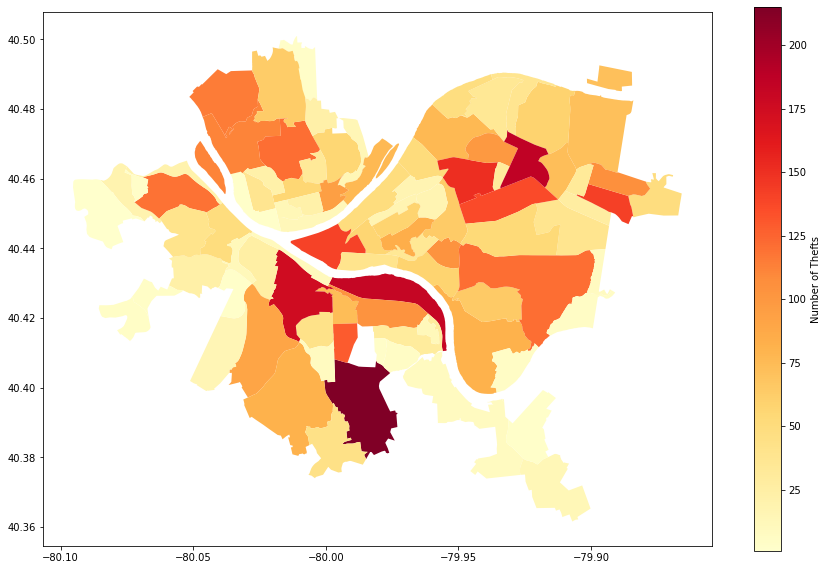

In [5]:
#Concatenate all previous series into one dataframe
theft = pd.concat([burglaries, auto_theft, robbery], axis = 1, join='inner')
theft["Thefts"] = np.nan #Make a new empty column that will hold the total number of Thefts per neighborhood

#For loop to insert value into each row of the new theft column
for x in range(len(theft)):
    theft.iloc[x,3] = 0
    for y in range(3):
        theft.iloc[x,3] += theft.iloc[x,y]
        
#Series used to graph thefts
theft_graph = theft.groupby("Neighborhood").sum()['Thefts']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp") #Reads neighborhoods SHP file

#Creates map
theft_map = neighborhoods.merge(theft_graph, how='left', left_on='hood', right_on='Neighborhood')
theft_map.plot(column='Thefts',
                  cmap='YlOrRd',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Thefts"}
                  )

### And the city with the most crime is...

In [6]:
#Organizes dataframe to view heighest theft
theft = theft.sort_values(by=['Thefts'], ascending=False)
theft

,#Burglary (2010),#Auto Theft (2010),#Robbery (2010),Thefts
Neighborhood,,,,
Carrick,118,48,49,215.0
East Liberty,64,59,63,186.0
South Side Flats,74,56,52,182.0
Mount Washington,115,38,22,175.0
Bloomfield,70,36,45,151.0
...,...,...,...,...
Summer Hill,2,2,0,4.0
Chateau,0,2,1,3.0
Ridgemont,3,0,0,3.0


## Yikes, Carrick isnt doing so good. But thefts aren't all that matter. Next, lets take a look which neighborhoods are the most drug-free!

---

# Drug Violations!

In [7]:
#Creates series based on number of drug violations per neighborhood
drug_vio = public_safety.groupby("Neighborhood").sum()['#Drug Violations (2010)']
#Sorts the values from least to greatest
drug_vio = drug_vio.sort_values(ascending=False)
drug_vio

Neighborhood
Knoxville           113
Middle Hill         102
Crawford-Roberts     90
Perry South          87
East Allegheny       73
                   ... 
St. Clair             0
Swisshelm Park        0
Lincoln Place         0
East Carnegie         0
Fairywood             0
Name: #Drug Violations (2010), Length: 90, dtype: int64

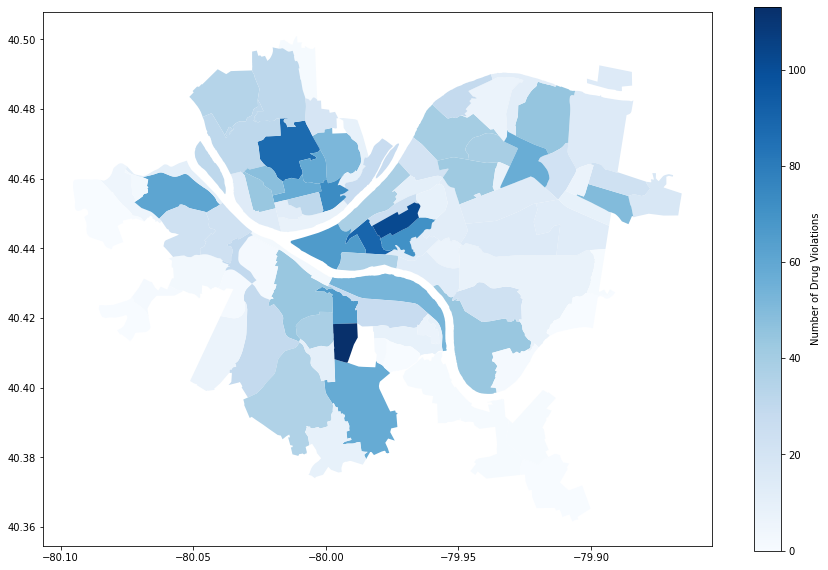

In [8]:
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
#Creates map of drug violations per neighborhood
drug_map = neighborhoods.merge(drug_vio, how='left', left_on='hood', right_on='Neighborhood')
drug_map.plot(column='#Drug Violations (2010)',
                  cmap='Blues',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Drug Violations"}
                  )

### Oh no, Knoxville. You took the lead on this one.

---

# Now, lets figure out which neighborhood is the best!

First, Id like to showcase the thefts and drug violations per neighborhood...

In [9]:
thefts = theft.groupby("Neighborhood").sum()['Thefts']
best_neigh = pd.concat([thefts, drug_vio], axis = 1, join='inner') #Creates dataframe from both thefts and drug violations
best_neigh["SubTotal Score"] = np.nan #New column for scores prior to weights

#For loop that inserts values for each row in the new column. Score per neighborhood
for x in range(len(best_neigh)):
    best_neigh.iloc[x,2] = 0
    for y in range(2):
        best_neigh.iloc[x,2] += best_neigh.iloc[x,y]
#Sorts the scores from least to greatest(Golf rules: the lower the score the better the neighborhood)
best_neigh = best_neigh.sort_values(by=['SubTotal Score'], ascending=True)
best_neigh

,Thefts,#Drug Violations (2010),SubTotal Score
Neighborhood,,,
Fairywood,1.0,0,1.0
New Homestead,3.0,1,4.0
East Carnegie,5.0,0,5.0
Ridgemont,3.0,2,5.0
Summer Hill,4.0,1,5.0
...,...,...,...
Mount Washington,175.0,44,219.0
South Side Flats,182.0,53,235.0
Knoxville,129.0,113,242.0


By the looks of it, Fairywood appears to be the safest neighborhood out there. It is important to apply weights to the differnt criteria in order to know which neighborhoods come above others after taking into account the personal preferences of most people, even though it wouldn't stop Fairywood from being the safest, it would allow us to rank them all more accurately.

In [10]:
#Weight application

weights = pd.read_csv("weights.csv", index_col="Timestamp")#Read weights CSV file
best_neigh["Final Score"] = np.nan #Create a final score column

#For loop to apply weights and insert the final score per neighborhood into the new column
for x in range(len(best_neigh)):
    best_neigh.iloc[x,3] = (best_neigh.iloc[x,0]*weights.iloc[87,6]) + (best_neigh.iloc[x,1]*weights.iloc[87,7])
#Sort the values from least to greatest.
best_neigh = best_neigh.sort_values(by=['Final Score'], ascending=True)
best_neigh

,Thefts,#Drug Violations (2010),SubTotal Score,Final Score
Neighborhood,,,,
Fairywood,1.0,0,1.0,3.895349
New Homestead,3.0,1,4.0,16.180299
East Carnegie,5.0,0,5.0,19.476744
Summer Hill,4.0,1,5.0,20.075648
Ridgemont,3.0,2,5.0,20.674552
...,...,...,...,...
Mount Washington,175.0,44,219.0,879.433173
South Side Flats,182.0,53,235.0,947.148891
East Liberty,186.0,57,243.0,980.707297


## Right away we see Summer Hill surpass Ridgemont once we take into account the specific preferences of a larger audience. However, this doesn't change our top three best neighborhoods, which are...

# Fairywood in first <br> New Homestead in second <br> and East Carnegie in third!